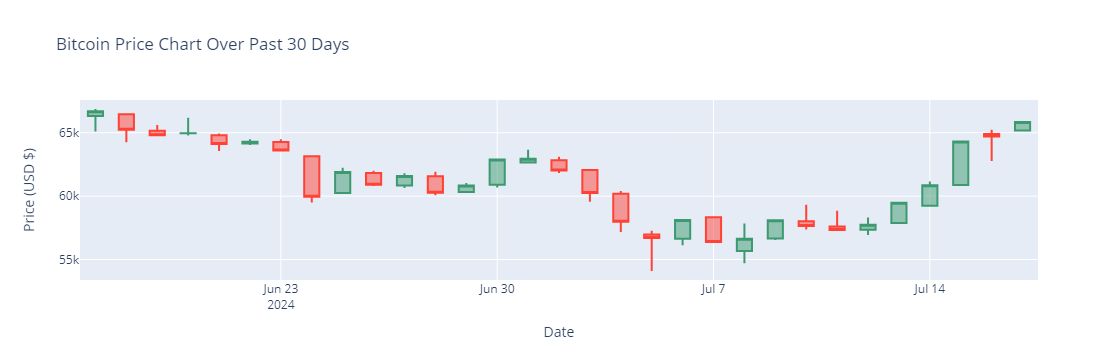

In [69]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo

cg = CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)
data = pd.DataFrame(bitcoin_data['prices'], columns=['TimeStamp', 'Price'])
data['Date'] = pd.to_datetime(data['TimeStamp'], unit='ms')
candlestick_data = data.groupby(data['Date'].dt.date).agg({'Price': ['min', 'max', 'first', 'last']})

plotlyfig = go.Figure(data=[go.Candlestick(x=candlestick_data.index,
                                           open=candlestick_data['Price']['first'],
                                           high=candlestick_data['Price']['max'],
                                           low=candlestick_data['Price']['min'],
                                           close=candlestick_data['Price']['last'])])

plotlyfig.update_layout(xaxis_rangeslider_visible=False,
                        xaxis_title='Date',
                        yaxis_title='Price (USD $)',
                        title='Bitcoin Price Chart Over Past 30 Days')

pyo.plot(plotlyfig, filename='./bitcoin_price_graph.html', auto_open=False)
plotlyfig.show()

#print(candlestick_data)